In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import investpy

In [2]:
def SMAIndicator(data, length):
    sma = data.rolling(window=length).mean()
    return sma

def showchart(stock, data):
    # Visualization Chart
    plt.figure(figsize=(16,8))
    plt.title(stock, fontsize=30)
    plt.plot(data, color='#95d0fc', label='SMA 18')
    plt.plot(data, '.', color='#000000', label='SMA 18')
    plt.plot(up, '.', color='g', markersize=12)
    plt.plot(down, '.', color='r', markersize=12)
    plt.plot(signal_up, '^', color='g', markersize=20, label='Signal')
    plt.xlabel('Date',fontsize=16)
    plt.ylabel('Price',fontsize=16)
    plt.grid()
    plt.legend()
    plt.show()

def realtime_scan(country_name, direction, time_frame):
    all_stocks = investpy.get_stocks_list(country=country_name)
    
    stock_type = 'equity'
    fromdate = '01/01/2017'
    todate = '01/01/2023'
    log = ''
    
    print('Realtime... Scanning {} stocks'.format(len(all_stocks)))
    print('Please wait...')
    
    for eachstock in all_stocks:
        try:
            stock_name = eachstock
            df = investpy.get_stock_historical_data(stock=stock_name, country=country_name, from_date=fromdate, to_date=todate)

            if time_frame == '1D':
                data = df['Close'].copy()
                sma18 = SMAIndicator(data, 18)
                
            else:
                data = df['Close'].copy()
                m_close = data.resample(time_frame, base=0).last()
                sma18 = SMAIndicator(m_close, 18)
            

            if direction == 'Long':
                for i in range(len(sma18)-1, len(sma18)):
                    if sma18[i]>sma18[i-1] and sma18[i-1]<sma18[i-2]:
                        print('Ticker:', stock_name, '  Date:', sma18.index[i], '  Price:', round(sma18[i],2))
                        showchart(stock_name, sma18)
                        if log == '':
                            log = '{}'.format(eachstock)
                        else:
                            log = log + ',{}'.format(eachstock)              
                        
            elif direction == 'Short':
                for i in range(len(sma18)-1, len(sma18)):
                    if sma18[i]<sma18[i-1] and sma18[i-1]>sma18[i-2]:
                        print('Ticker:', stock_name, '  Date:', sma18.index[i], '  Price:', round(sma18[i],2))
                        showchart(stock_name, sma18)
                        if log == '':
                            log = '{}'.format(eachstock)
                        else:
                            log = log + ',{}'.format(eachstock)
                              
        except:
            pass
    
    return log

stocks_countries = investpy.get_stock_countries()
print('Countries List')
print(str(stocks_countries))

Countries List
['argentina', 'brazil', 'canada', 'chile', 'colombia', 'costa rica', 'jamaica', 'mexico', 'peru', 'united states', 'venezuela', 'austria', 'belgium', 'bosnia', 'bulgaria', 'croatia', 'cyprus', 'czech republic', 'denmark', 'finland', 'france', 'germany', 'greece', 'hungary', 'iceland', 'ireland', 'italy', 'luxembourg', 'malta', 'montenegro', 'netherlands', 'norway', 'poland', 'portugal', 'romania', 'russia', 'serbia', 'slovakia', 'slovenia', 'spain', 'sweden', 'switzerland', 'turkey', 'ukraine', 'united kingdom', 'australia', 'bangladesh', 'china', 'hong kong', 'india', 'indonesia', 'japan', 'kazakhstan', 'malaysia', 'mongolia', 'new zealand', 'pakistan', 'philippines', 'singapore', 'south korea', 'sri lanka', 'taiwan', 'thailand', 'vietnam', 'bahrain', 'egypt', 'iraq', 'israel', 'jordan', 'kuwait', 'lebanon', 'oman', 'palestine', 'qatar', 'saudi arabia', 'dubai', 'botswana', 'ivory coast', 'kenya', 'malawi', 'mauritius', 'morocco', 'namibia', 'nigeria', 'rwanda', 'south 

## STOCK SCREENER
### Scan all stocks in realtime for change and print result

Realtime... Scanning 272 stocks
Please wait...


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:42: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")



Ticker: CHMF   Date: 2020-10-31 00:00:00   Price: 943.33
Ticker: MRKS   Date: 2020-10-31 00:00:00   Price: 0.25
Ticker: CHKZ   Date: 2020-10-31 00:00:00   Price: 5015.56
Ticker: NNSB   Date: 2020-10-31 00:00:00   Price: 1425.83
Ticker: AGRODR   Date: 2020-10-31 00:00:00   Price: 685.93
Ticker: SFIN   Date: 2020-10-31 00:00:00   Price: 481.5
Ticker: NNSB_p   Date: 2020-10-31 00:00:00   Price: 580.28
Finished... done
Saving file... done


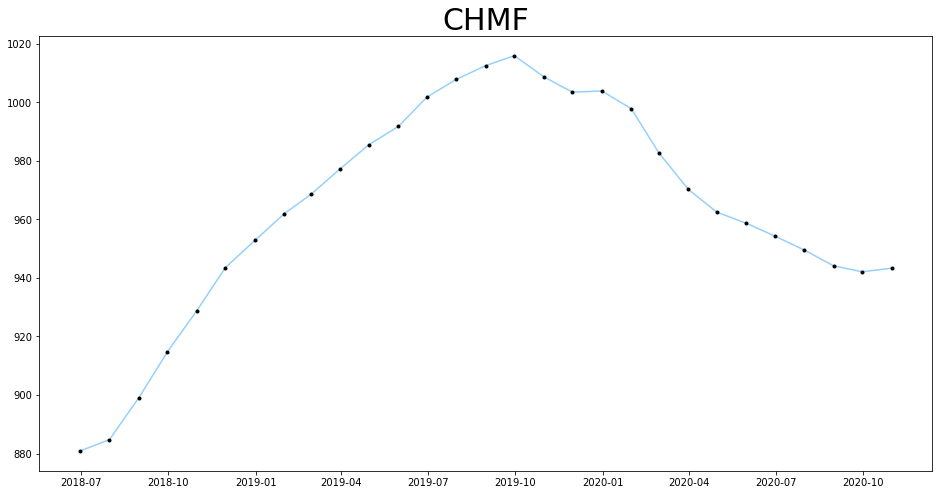

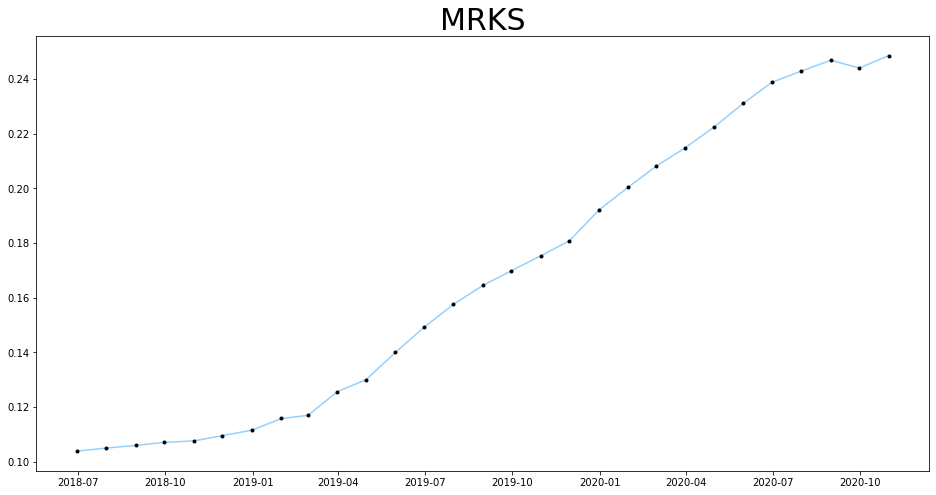

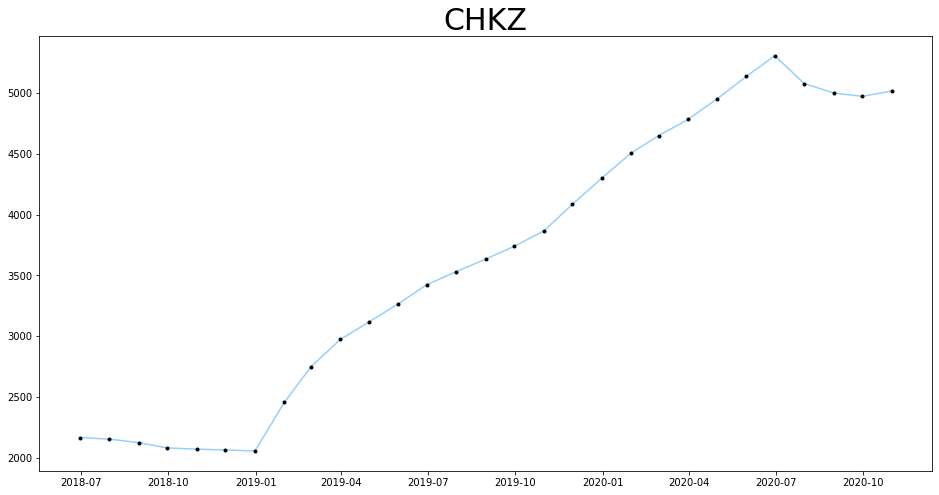

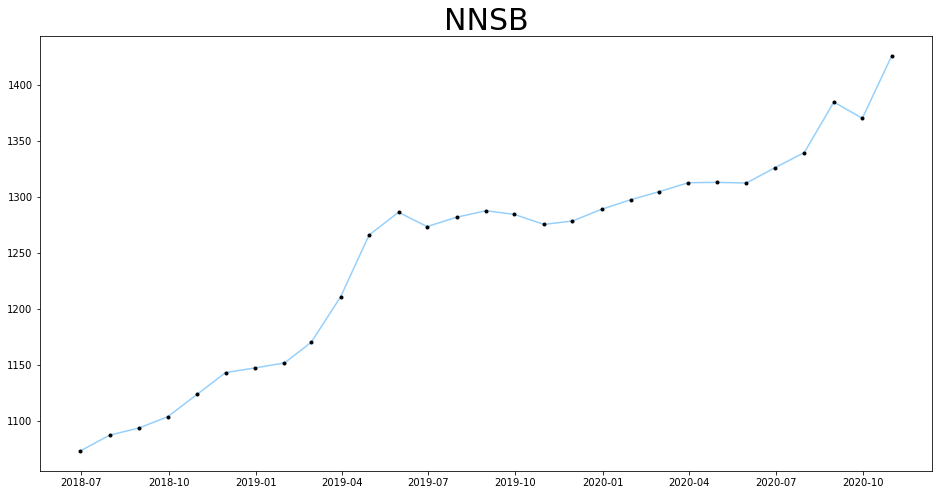

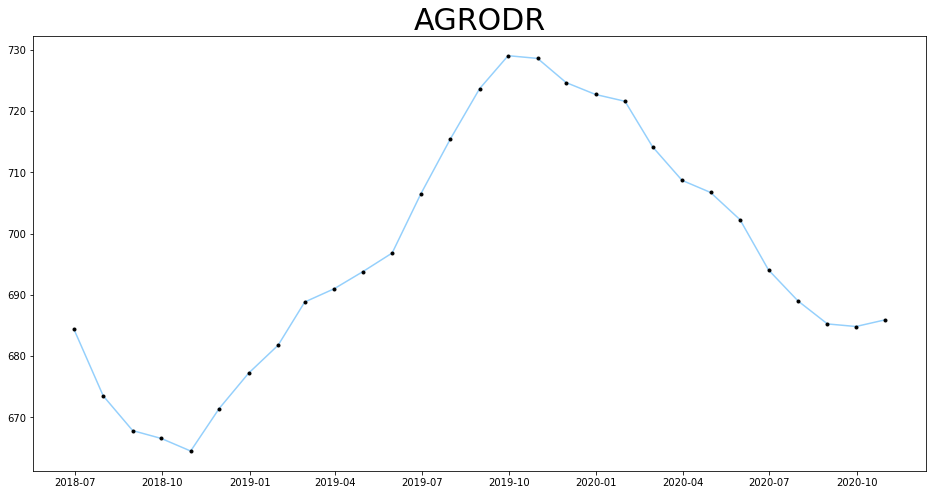

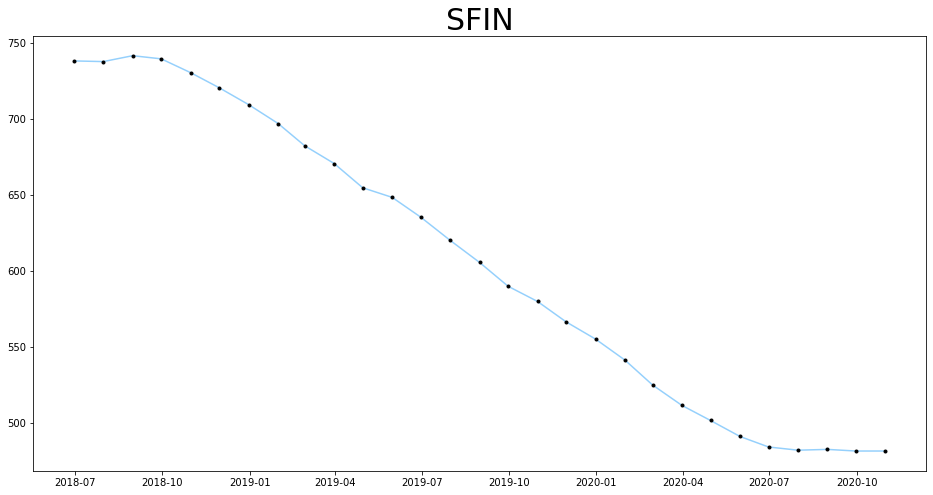

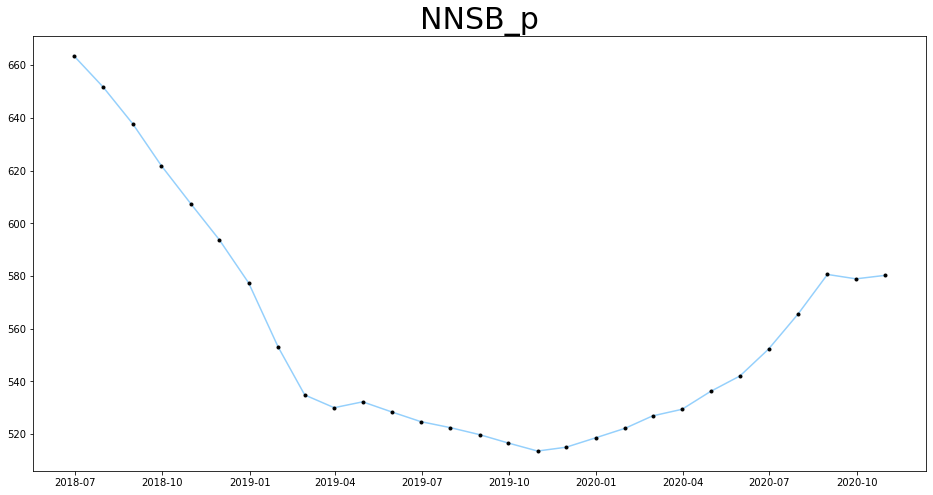

In [3]:
log = realtime_scan('russia', 'Long', '1M')

print('Finished... done')

file1 = open("DataFile_russia.txt", "w+") 
file1.write(log)
file1.close() 
print('Saving file... done')